In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [11]:
friends_chars={} 
Rachel=[]
Ross=[]
Joey=[]
Chandler=[]
Phoebe=[]
Monica=[]
with open("transcripts_friends/season_all/merged.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        #print("Line {}: {}".format(cnt, line))
        if line.startswith('Rachel:'):
            Rachel.append(line[8:])
        elif line.startswith('Ross:'):
            Ross.append(line[6:])
        elif line.startswith('Monica:'):
            Monica.append(line[8:])
        elif line.startswith('Chandler:'):
            Chandler.append(line[10:])
        if line.startswith('Phoebe:'):
            Phoebe.append(line[8:])
        if line.startswith('Joey:'):
            Joey.append(line[6:])

friends_chars['RACHEL']=Rachel
friends_chars['ROSS']=Ross
friends_chars['MONICA']=Monica
friends_chars['PHOEBE']=Phoebe
friends_chars['CHANDLER']=Chandler
friends_chars['JOEY']=Joey

In [12]:
import pandas as pd
df6 = pd.DataFrame(friends_chars['MONICA'])
df5 = pd.DataFrame(friends_chars['ROSS'])

df4 = pd.DataFrame(friends_chars['RACHEL'])
df3 = pd.DataFrame(friends_chars['PHOEBE'])

df2 = pd.DataFrame(friends_chars['JOEY'])
df1 = pd.DataFrame(friends_chars['CHANDLER'])

In [13]:
df1.head()

,0
0,"You know, I'd love to, but I'm a little tired.\n"
1,You're on!\n
2,He could be alone. This morning I heard him do...
3,She's cheating on Joey with Ross!\n
4,Wow!\n


In [14]:
listOfScores1 = ['Chandler'] *df1.shape[0]
listOfScores2 = ['Joey'] *df2.shape[0]
listOfScores3 = ['Phoebe'] *df3.shape[0]
listOfScores4 = ['Rachel'] *df4.shape[0]
listOfScores5 = ['Ross'] *df5.shape[0]
listOfScores6 = ['Monica'] *df6.shape[0]


In [15]:
df1['Character'] = listOfScores1
df2['Character'] = listOfScores2 
df3['Character'] = listOfScores3
df4['Character'] = listOfScores4
df5['Character'] = listOfScores5
df6['Character'] = listOfScores6

In [16]:
df1=df1.rename(columns={0: 'dialogue'})
df2=df2.rename(columns={0: 'dialogue'})
df3=df3.rename(columns={0: 'dialogue'})
df4=df4.rename(columns={0: 'dialogue'})
df5=df5.rename(columns={0: 'dialogue'})
df6=df6.rename(columns={0: 'dialogue'})

In [17]:
df = pd.concat([df1, df2,df3,df4,df5,df6])
df.tail()

,dialogue,Character
16323,But... you suck!\n,Monica
16324,Oh my God! You're good!\n,Monica
16325,(to Chandler) Oh my God. That was so amazing! ...,Monica
16326,Why?\n,Monica
16327,This is so great! Now we can enter into double...,Monica


In [18]:
from io import StringIO
col = ['Character', 'dialogue']
df = df[col]
df = df[pd.notnull(df['dialogue'])]
df.columns = ['Character', 'dialogue']
df['category_id'] = df['Character'].factorize()[0]
category_id_df = df[['Character', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Character']].values)
df.tail()

,Character,dialogue,category_id
16323,Monica,But... you suck!\n,5
16324,Monica,Oh my God! You're good!\n,5
16325,Monica,(to Chandler) Oh my God. That was so amazing! ...,5
16326,Monica,Why?\n,5
16327,Monica,This is so great! Now we can enter into double...,5


In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

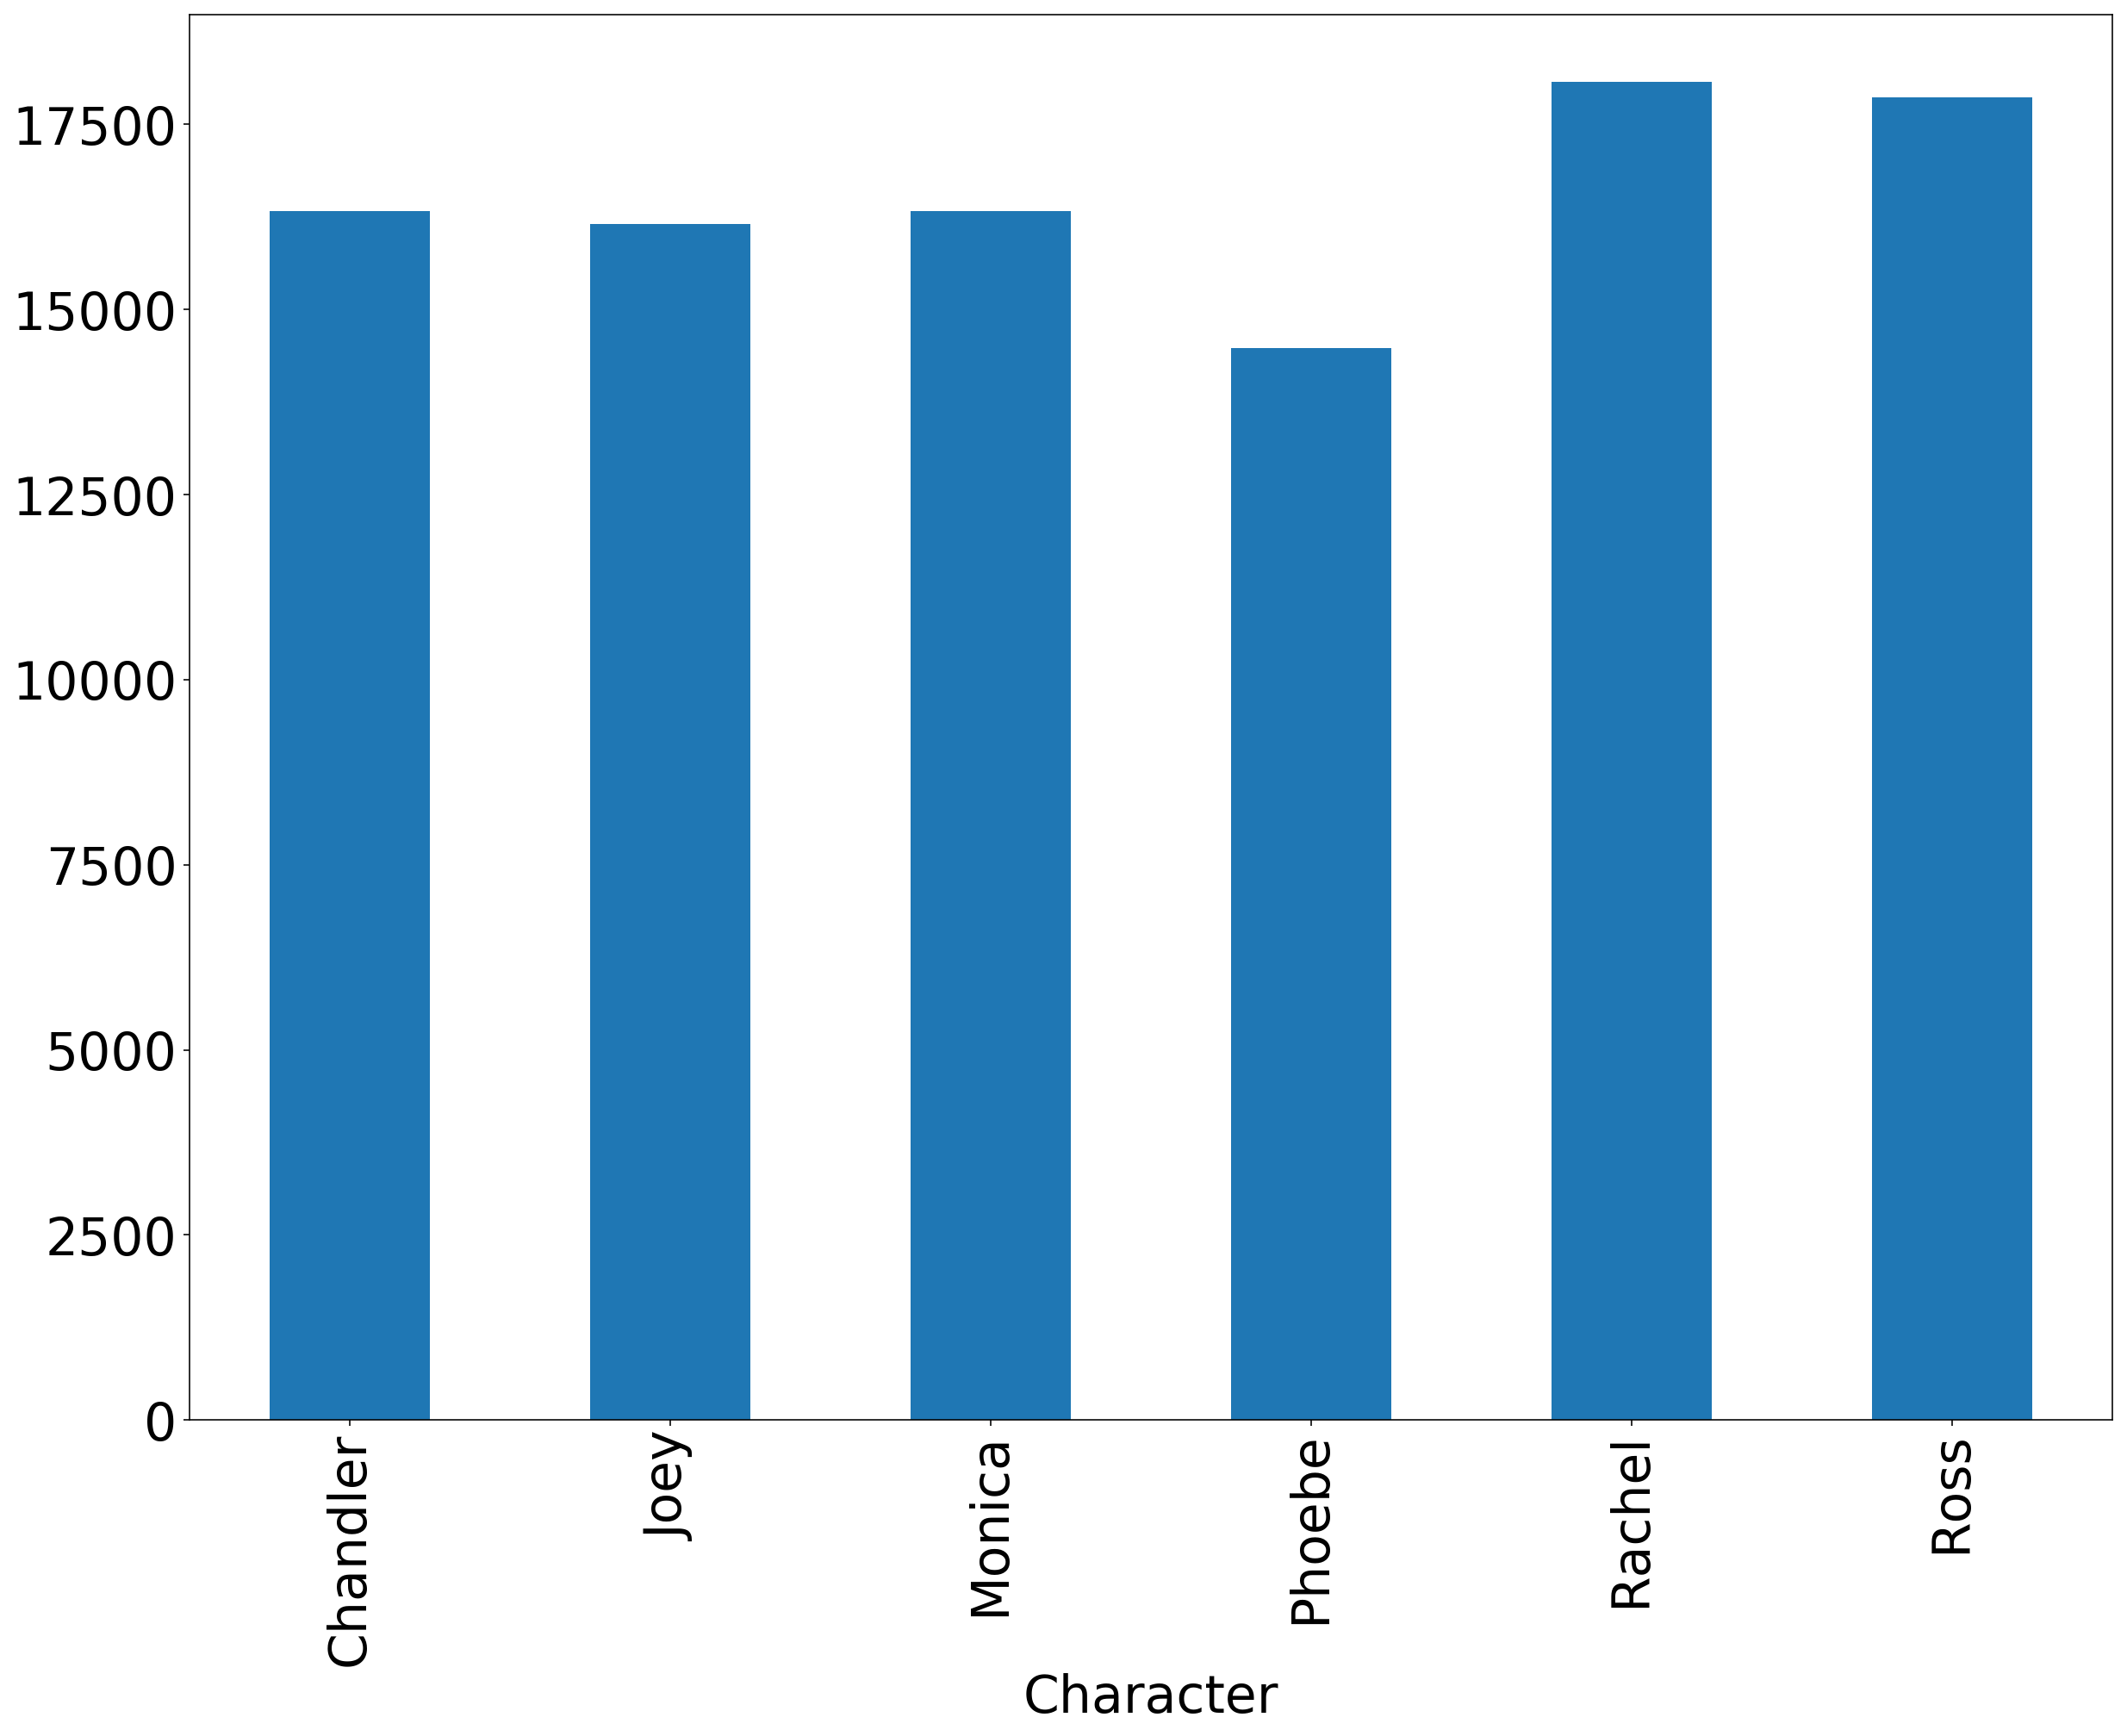

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,15))
df.groupby('Character').dialogue.count().plot.bar(ylim=0)
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams.update({'font.size': 30})
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['dialogue'], df['category_id'], test_size=0.33, random_state=42)
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(X_train)
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [29]:
vocab_size = 30000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
# sequences = tokenizer.texts_to_sequences(training_sentences)
# padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)





In [30]:
MAX_SEQUENCE_LENGTH = 120
X = tokenizer.texts_to_sequences(X_train.values)#df['Dialogue']#tokenizer.texts_to_sequences(df['Dialogue'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
X

Shape of data tensor: (66486, 120)


array([[   0,    0,    0, ...,   15,    4, 1031],
       [   0,    0,    0, ...,  367,    4, 2966],
       [   0,    0,    0, ...,   15,  441, 1222],
       ...,
       [   0,    0,    0, ...,    0,    0,  441],
       [   0,    0,    0, ...,   21,  326,  274],
       [   0,    0,    0, ...,    0,    0,   38]], dtype=int32)

In [31]:
x_test=tokenizer.texts_to_sequences(X_test.values)#df['Dialogue']#tokenizer.texts_to_sequences(df['Dialogue'].values)
x_test = pad_sequences(x_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_test.shape)
x_test

Shape of data tensor: (32747, 120)


array([[    0,     0,     0, ...,    43, 14546, 14547],
       [    0,     0,     0, ...,    91,    35,   702],
       [    0,     0,     0, ...,   121,    67,   108],
       ...,
       [    0,     0,     0, ...,    55,   265,    29],
       [    0,     0,     0, ...,    27,   513,    61],
       [    0,     0,     0, ...,    23,   322,  3129]], dtype=int32)

In [32]:
Y = pd.get_dummies(y_train).values#df['category_id']
#print('Shape of label tensor:', Y.shape)
Y

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=uint8)

In [33]:
y_test = pd.get_dummies(y_test).values#df['category_id']
#print('Shape of label tensor:', Y.shape)
y_test

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [34]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 120
# This is fixed.
EMBEDDING_DIM = 64


from tensorflow.keras.callbacks import EarlyStopping

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model1.add(tf.keras.layers.SpatialDropout1D(0.2))
model1.add(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model1.add(tf.keras.layers.Dense(6, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model1.fit(X, Y, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

W1022 10:05:33.453474 140735584691072 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 59837 samples, validate on 6649 samples
Epoch 1/10
59837/59837 [==============================] - 69s 1ms/sample - loss: 1.7342 - accuracy: 0.2547 - val_loss: 1.6381 - val_accuracy: 0.3262
Epoch 2/10
59837/59837 [==============================] - 64s 1ms/sample - loss: 1.5209 - accuracy: 0.3988 - val_loss: 1.5235 - val_accuracy: 0.3916
Epoch 3/10
59837/59837 [==============================] - 66s 1ms/sample - loss: 1.3571 - accuracy: 0.4725 - val_loss: 1.4858 - val_accuracy: 0.4151
Epoch 4/10
59837/59837 [==============================] - 67s 1ms/sample - loss: 1.2521 - accuracy: 0.5122 - val_loss: 1.4441 - val_accuracy: 0.4446
Epoch 5/10
59837/59837 [==============================] - 64s 1ms/sample - loss: 1.1782 - accuracy: 0.5398 - val_loss: 1.4265 - val_accuracy: 0.4539
Epoch 6/10
59837/59837 [==============================] - 65s 1ms/sample - loss: 1.1208 - accuracy: 0.5607 - val_loss: 1.4222 - val_accuracy: 0.4709
Epoch 7/10
59837/59837 [==============================] -

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(24, activation='relu'),
#     tf.keras.layers.Dense(6, activation='sigmoid')
# ])
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.summary()


In [ ]:
# num_epochs = 10
# model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

In [39]:
y_pred = model1.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
y_pred


array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

In [40]:
y_test

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

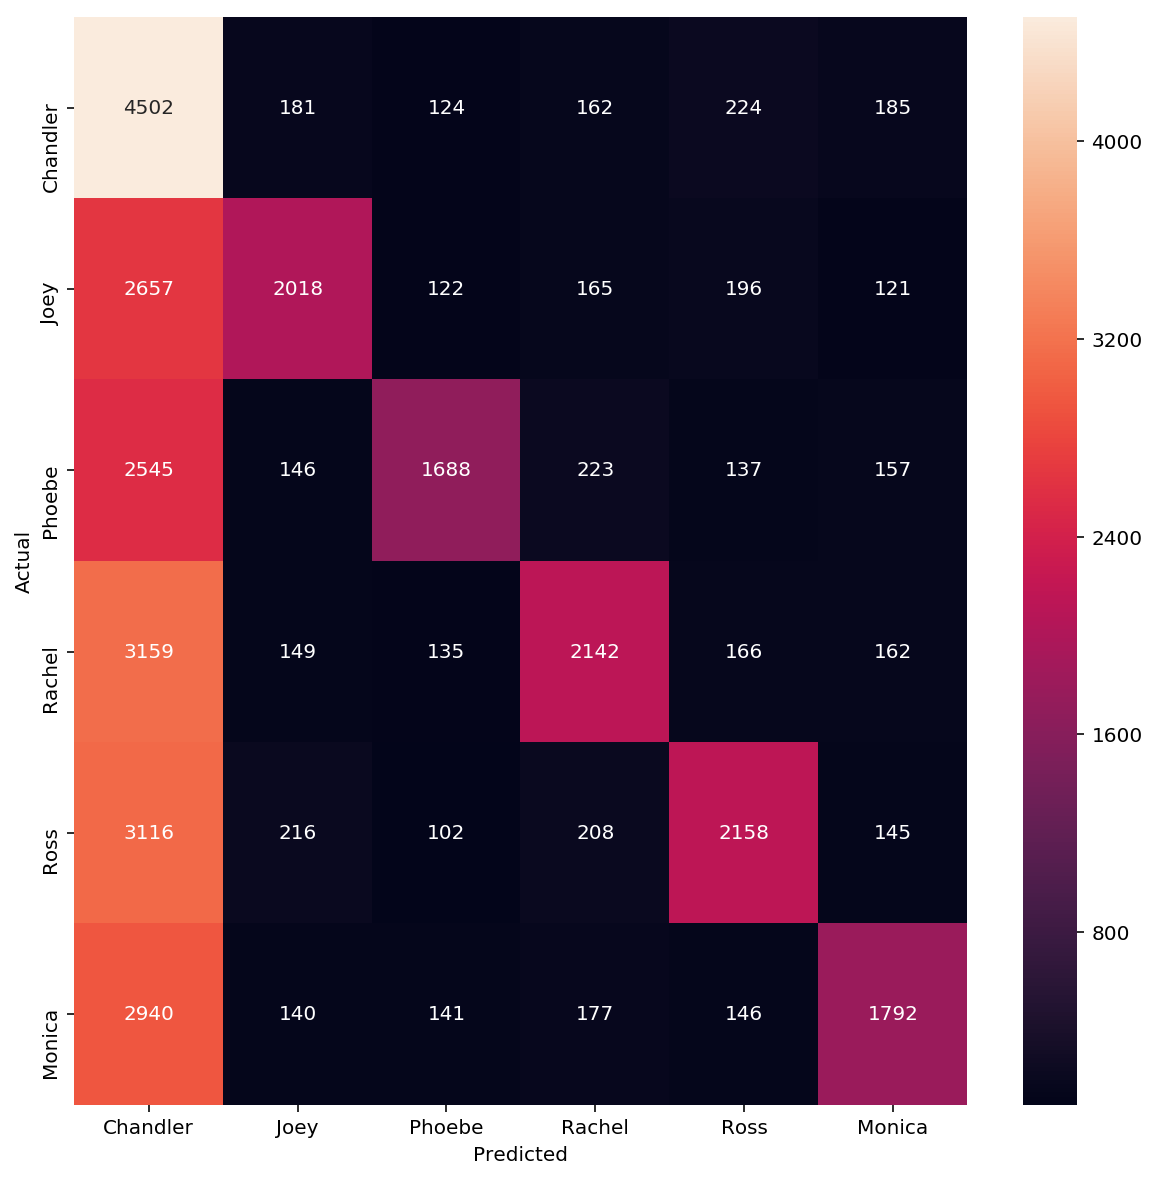

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = confusion_matrix(
    y_test.argmax(axis=1), y_pred.argmax(axis=1))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Score.values, yticklabels=category_id_df.Score.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

####stuck here#####

In [42]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Score'].unique()))

              precision    recall  f1-score   support

    Chandler       0.74      0.36      0.49      5378
        Joey       0.71      0.38      0.50      5279
      Phoebe       0.73      0.34      0.47      4896
      Rachel       0.70      0.36      0.48      5913
        Ross       0.71      0.36      0.48      5945
      Monica       0.70      0.34      0.45      5336

   micro avg       0.71      0.36      0.48     32747
   macro avg       0.71      0.36      0.48     32747
weighted avg       0.71      0.36      0.48     32747
 samples avg       0.36      0.36      0.36     32747

